# Santander Bank Binary Classification (Algorithm 1)
Using Logistic Regression

### Importing Packages

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

### Opening datasets

In [78]:
%%time
with open('../../data/reduced_training_data.csv') as file:
    training_data = pd.read_csv(file)

with open('../../data/reduced_testing_data.csv') as file:
    testing_data = pd.read_csv(file)

with open('../../data/test.csv') as file:
    testing_data1 = pd.read_csv(file)

CPU times: user 13.9 s, sys: 6.26 s, total: 20.2 s
Wall time: 28.7 s


In [12]:
training_int_vals_only = training_data.iloc[:,2:]
training_target_vals_only = training_data['target']

### Logistic Regression

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(training_int_vals_only, training_target_vals_only, test_size=0.3, random_state=10, stratify=training_target_vals_only)

In [15]:
X_train, X_test, Y_train, Y_test

(          var_0   var_1    var_2    var_3    var_4    var_5   var_6    var_7  \
 118660   6.3621  5.1034   9.0619   8.6041   9.7014   5.7682  6.2176  19.1515   
 87838   14.4450  4.0567  10.7381  11.0638   9.2711  -1.1342  4.1611  14.9470   
 157069   8.2442 -4.0511  10.5725   4.7781  11.6842  -9.0438  5.6573  15.6931   
 96497   10.1530 -5.2584   6.6344   3.3322  10.8233   1.0801  5.3971  17.2122   
 24630   17.0395 -8.3155  10.9771   7.8096  13.3271 -20.0029  5.1580  18.2400   
 ...         ...     ...      ...      ...      ...      ...     ...      ...   
 184167  14.2037  3.4434   9.1957   3.3622  10.1378  -4.9193  5.5141  15.8381   
 65617   13.3555  1.9620   8.6350   6.8071   8.7281   2.9986  5.0088  14.6058   
 170226   8.4790 -4.4555  11.5666   9.6247  11.7914  -1.3737  6.1561  19.8069   
 143377  10.3041  2.4986   8.2943   8.1730  14.5634 -10.6302  4.3293  15.8007   
 112090   9.5276 -4.1086   7.7000   6.1100   9.8585 -10.8082  6.7000  18.5443   
 
          var_8   var_9  .

In [1]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
testing_data_std = sc.transform(testing_data)

NameError: name 'StandardScaler' is not defined

In [19]:
%%time
lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, Y_train)

CPU times: user 3.4 s, sys: 3.71 s, total: 7.11 s
Wall time: 12.2 s


LogisticRegression(C=100.0, multi_class='ovr', random_state=1)

### Create the predictions

In [55]:
Y_predicted = lr.predict(X_test_std)

(array([57944.,  2056.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

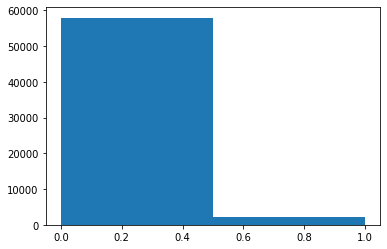

In [60]:
plt.hist(Y_predicted, bins=2)

#### Accuracy

In [73]:
print("LogisticRegression Accuracy %.5f" %metrics.accuracy_score(Y_test, Y_predicted))

LogisticRegression Accuracy 0.91238


#### Classification Report

In [41]:
print(classification_report(Y_test, Y_predicted))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     53971
           1       0.69      0.23      0.35      6029

    accuracy                           0.91     60000
   macro avg       0.80      0.61      0.65     60000
weighted avg       0.90      0.91      0.89     60000



In [65]:
testing_predicted

array([0, 0, 0, ..., 0, 0, 0])

### Extracting Predictions

In [71]:
id_data_ts = testing_data1['ID_code']

In [72]:
# Make predictions on the test set
predictions = lr.predict(testing_data_std)
predictions = np.round(predictions).astype(int).flatten()

# Create the submission file
data = np.column_stack((id_data_ts, predictions))
submission = pd.DataFrame(data, columns=['ID_code', 'target'])
submission.to_csv('submission_logistic_reg.csv', index=False)

print("Submission file created successfully!")

Submission file created successfully!
